# Installing Dependecies

In [58]:
!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

In [34]:
def load_adjacency_list(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # Convert the DataFrame to a list of tuples
    edges = [tuple(x) for x in df.values]
    return edges

In [35]:
def create_graph_from_adj_list(edges):
    # Create a NetworkX graph from the adjacency list
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

In [36]:
csv_file = "roads-usroads/edges.csv"
edges = load_adjacency_list(csv_file)
G = create_graph_from_adj_list(edges)

In [37]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 129163
Number of edges: 165434


In [38]:
def get_largest_component_subgraph(G, node_sample_size=None):
    if node_sample_size:
        # Take a random sample of nodes from the graph
        sampled_nodes = random.sample(list(G.nodes()), node_sample_size)
        G = G.subgraph(sampled_nodes)
    
    # Get the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc)

In [39]:
def calculate_diameter_largest_component(G, node_sample_size=None):
    largest_subgraph = get_largest_component_subgraph(G, node_sample_size)
    return nx.diameter(largest_subgraph)

In [40]:
def calculate_avg_path_length_largest_component(G, node_sample_size=None):
    largest_subgraph = get_largest_component_subgraph(G, node_sample_size)
    return nx.average_shortest_path_length(largest_subgraph)

In [22]:
def calculate_shortest_paths_largest_component(G, node_sample_size=None):
    largest_subgraph = get_largest_component_subgraph(G, node_sample_size)
    return dict(nx.shortest_path_length(largest_subgraph))

In [60]:
# Define the number of nodes to sample 
node_sample_size = 100000

In [61]:
# Calculate individual metrics for the largest component of the sampled subgraph
diameter = calculate_diameter_largest_component(G, node_sample_size)
avg_path_length = calculate_avg_path_length_largest_component(G, node_sample_size)
shortest_paths = calculate_shortest_paths_largest_component(G, node_sample_size)

In [43]:
print("Diameter (Largest Component, Subset):", diameter)
print("Average Path Length (Largest Component, Subset):", avg_path_length)
print("Shortest Paths (Largest Component, Subset):", shortest_paths)

Diameter (Largest Component, Subset): 3
Average Path Length (Largest Component, Subset): 2.1333333333333333
Shortest Paths (Largest Component, Subset): {np.int64(24709): {np.int64(24709): 0, np.int64(24617): 1, np.int64(24699): 1, np.int64(24561): 2, np.int64(24711): 2, np.int64(24937): 3}, np.int64(24711): {np.int64(24711): 0, np.int64(24699): 1, np.int64(24937): 1, np.int64(24709): 2, np.int64(24617): 3, np.int64(24561): 4}, np.int64(24617): {np.int64(24617): 0, np.int64(24561): 1, np.int64(24709): 1, np.int64(24699): 2, np.int64(24711): 3, np.int64(24937): 4}, np.int64(24937): {np.int64(24937): 0, np.int64(24711): 1, np.int64(24699): 2, np.int64(24709): 3, np.int64(24617): 4, np.int64(24561): 5}, np.int64(24561): {np.int64(24561): 0, np.int64(24617): 1, np.int64(24709): 2, np.int64(24699): 3, np.int64(24711): 4, np.int64(24937): 5}, np.int64(24699): {np.int64(24699): 0, np.int64(24709): 1, np.int64(24711): 1, np.int64(24617): 2, np.int64(24937): 2, np.int64(24561): 3}}


In [62]:
def save_results_to_csv(diameter, avg_path_length, shortest_paths, output_file):
    # Create a DataFrame for diameter and average path length
    metrics_df = pd.DataFrame({
        'Metric': ['Diameter', 'Average Path Length'],
        'Value': [diameter, avg_path_length]
    })

    # Save diameter and average path length to CSV
    metrics_df.to_csv(output_file, index=False)

    # Save shortest paths as a separate CSV
    shortest_paths_df = pd.DataFrame([
        {'Source': src, 'Target': tgt, 'Path Length': length}
        for src, targets in shortest_paths.items()
        for tgt, length in targets.items()
    ])
    
    shortest_paths_output = output_file.replace('.csv', '_shortest_paths.csv')
    shortest_paths_df.to_csv(shortest_paths_output, index=False)

In [63]:
output_file = "graph_metrics.csv"
save_results_to_csv(diameter, avg_path_length, shortest_paths, output_file)

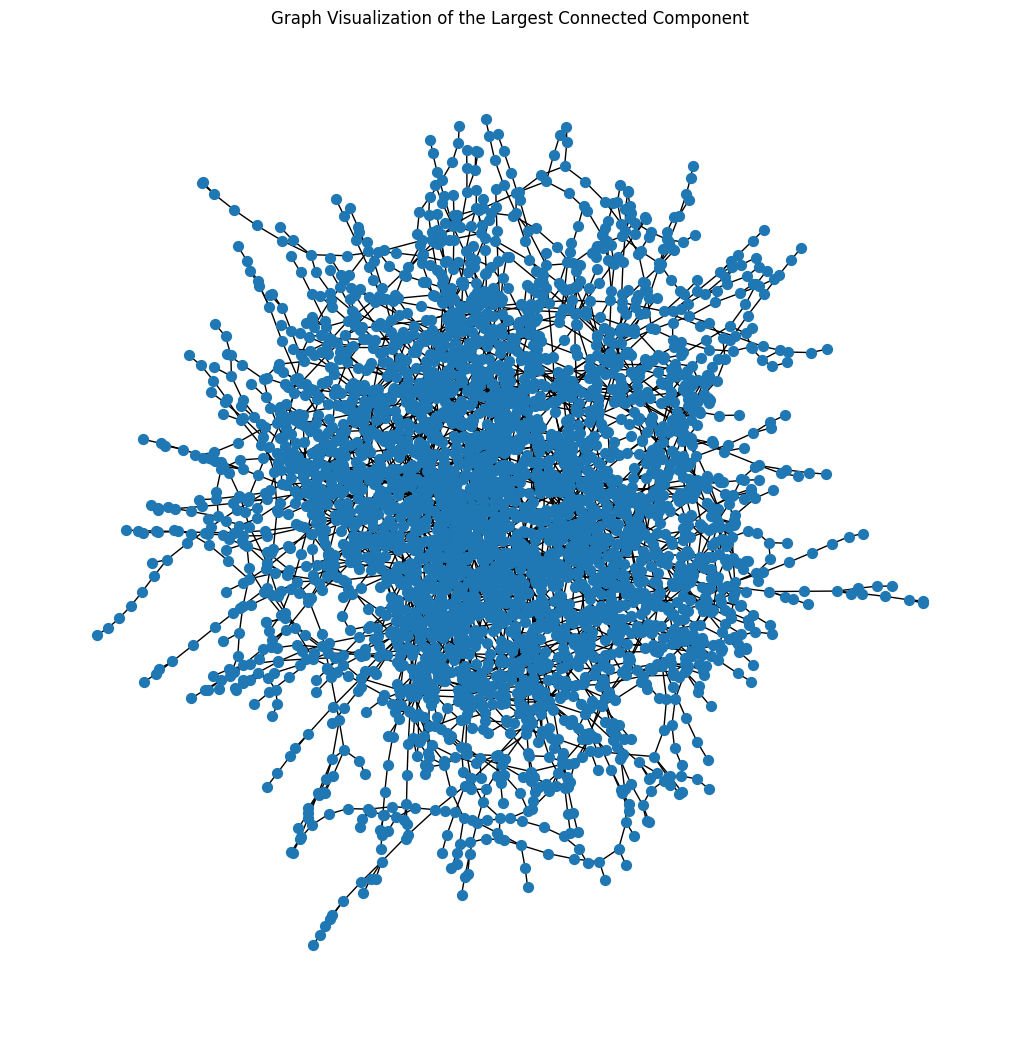

In [59]:
def plot_graph(G, node_sample_size=None):
    if node_sample_size:
        sampled_nodes = random.sample(list(G.nodes()), node_sample_size)
        G = G.subgraph(sampled_nodes)
    largest_cc = max(nx.connected_components(G), key=len)
    largest_subgraph = G.subgraph(largest_cc)
    
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(largest_subgraph)
    nx.draw(largest_subgraph, pos, node_size=50, with_labels=False)
    plt.title("Graph Visualization of the Largest Connected Component")
    plt.show()

plot_graph(G, node_sample_size=100000)

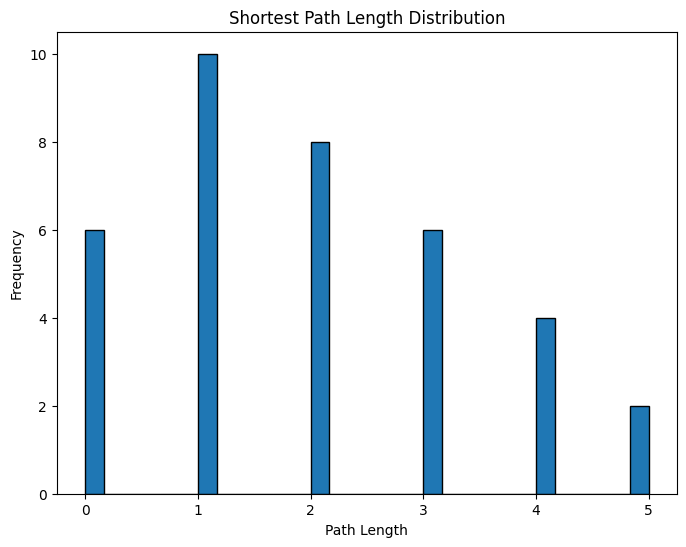

In [53]:
def plot_shortest_path_distribution(shortest_paths):
    path_lengths = []
    for src, targets in shortest_paths.items():
        for tgt, length in targets.items():
            path_lengths.append(length)
    
    plt.figure(figsize=(8, 6))
    plt.hist(path_lengths, bins=30, edgecolor='black')
    plt.title("Shortest Path Length Distribution")
    plt.xlabel("Path Length")
    plt.ylabel("Frequency")
    plt.show()

plot_shortest_path_distribution(shortest_paths)